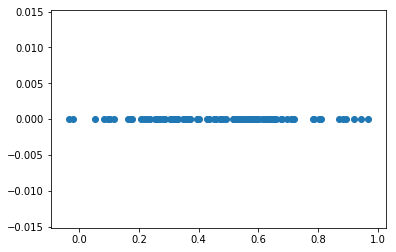

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib import animation, rc
from IPython.display import HTML

x_gen = np.random.randn(100)*0.2 + 0.5
plt.scatter(x_gen, x_gen*0)

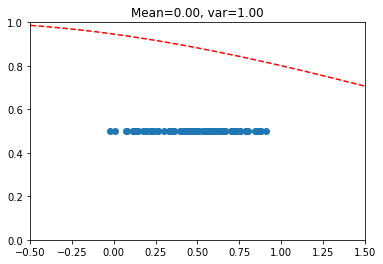

In [44]:
x_gen_ad = torch.tensor(x_gen, requires_grad=False)
theta = torch.tensor([0.0, 1.0], dtype=x_gen_ad.dtype, requires_grad=True)

losses = []
thetas = []
for k in range(100):
    
    p = torch.distributions.Normal(theta[0], theta[1])
    loss = torch.mean(p.log_prob(x_gen_ad))
    loss.backward()

    losses.append(loss.item())
    thetas.append(theta.detach().numpy().copy())

    with torch.no_grad():
        theta += 0.01 * theta.grad
        theta.grad.zero_()
    
fig = plt.figure()
ax = plt.gca()
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
def animate(i):
    ax.clear()
    ax.scatter(x_gen, x_gen*0 + 0.5)
    ax.plot(np.linspace(-1., 2.0, 100), gaussian(np.linspace(0.0, 1.0, 100),thetas[i][0], thetas[i][1]),
            "r--")
    plt.xlim(-0.5, 1.5)
    plt.ylim(0., 1.)
    plt.title("Mean=%02.2f, var=%02.2f" % (thetas[i][0], thetas[i][1]))
    return ax
anim = animation.FuncAnimation(fig, animate,
                               frames=len(losses), interval=100, repeat=True)
HTML(anim.to_html5_video())

In [ ]:
x_gen = np.random.randn(100)*0.2 + 0.5
x_gen_ad = torch.tensor(x_gen, requires_grad=False)
theta = torch.tensor([0.0, 1.0],
                     dtype=x_gen_ad.dtype,
                     requires_grad=True)

for k in range(100):
    p = torch.distributions.Normal(theta[0], theta[1])
    loss = torch.mean(p.log_prob(x_gen_ad))
    loss.backward()
    with torch.no_grad():
        theta += 0.01 * theta.grad
        theta.grad.zero_()

In [9]:
# Set up a dist
theta = torch.tensor([0.0, 1.0], requires_grad=True)

p = torch.distributions.Normal(theta[0], theta[1])

print(theta, p)

theta.grad = None
err = p.log_prob(0.1)
err.backward(retain_graph=True)
print(theta.grad)
theta.grad = None
err = p.log_prob(0.1)
err.backward(retain_graph=True)
print(theta.grad)

(tensor([0., 1.], requires_grad=True), Normal(loc: 0.0, scale: 1.0))
tensor([ 0.1000, -0.9900])
tensor([ 0.1000, -0.9900])
